Objetivo: Equilibrar la cantidad de clientes que se leen cada día de lectura mediante la agrupación por barrios más idónea con las siguientes restricciones:

 1. Minimizar la desviación media absoluta (MAE) de la cantidad de clientes leídos cada día.
 2. Los nuevos grupos de días de lecturas deben estar conformado por un solo bloque de barrios.
 3. Minimizar la cantidad de movimientos de días de lectura.

Cantidad de Clientes por día de Lectura: hay un total de 530.656 usuarios distribuidos 329 barrios, que pueden ser distribuidos equitativamente sobre los 13 días de lectura en 40.820 cada uno. Según lo anterior, la desviación absoluta media sobre dicho valor central es de 12.753 clientes.
El objetivo con la propuesta planteada es disminuir al máximo la desviación media absoluta, mediante la reubicación de barrios en otros días, teniendo como prioridades la cercanía de los barrios que se mueven con los del día original.

In this notebook, we take the nodes.csv file and use it to create a barrios.csv with the following columns:

0. Id
1. Nombre
2. Polygon coordinates in [[x1,y1],[x2,y2]] format.
3. Neigborhs id in [n1, n2, n3] format.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import descartes
import csv

In [3]:
import pandas as pd

# Parsing the CSV files

In [4]:
with open('nodos.csv') as f:
    nodos = pd.read_csv(f)

In [5]:
barrios = nodos.NOMBRE[nodos.NOMBRE.duplicated()==False].values

vecinos = {}

coordinates  = {}

for barrio in barrios:
    nodos_barrio = nodos[nodos.NOMBRE==barrio]
    coordinates_barrio = zip(nodos_barrio.X.values, nodos_barrio.Y.values)
    poligon = Polygon(coordinates_barrio)

    vecinos_del_barrio = []
    
    coordinates[barrio] = coordinates_barrio
    
    for otro_barrio in barrios:
        nodos_barrio = nodos[nodos.NOMBRE==otro_barrio]
        otros_coordinates = zip(nodos_barrio.X.values, nodos_barrio.Y.values)

        barrio_poligono = Polygon(otros_coordinates)

        # buffer is needed to be able to find neighborhs 
        if barrio != otro_barrio and poligon.buffer(50).intersects(barrio_poligono):
            vecinos_del_barrio.append(otro_barrio)
        
        vecinos[barrio] = vecinos_del_barrio

In [6]:
len(barrios)

329

In [7]:
len(coordinates)

329

In [8]:
len(vecinos)

329

We need to load the number of clients and the day attribute from another CSV file and concatenate with the original one

In [9]:
with open('lectura.csv') as f:
    lectura = pd.read_csv(f)

In [10]:
lectura.head()

,BARRIO,GIS,Clientes,Dia
0,12 DE OCTUBRE,BARRIO 12 DE OCTUBRE,860,1
1,20 DE JULIO,BARRIO 20 DE JULIO,575,1
2,3 DE JULIO,BARRIO 3 DE JULIO,495,3
3,ACUEDUCTO SAN ANTONIO,BARRIO ACUEDUCTO SAN ANTONIO,3,2
4,AGUABLANCA,BARRIO AGUABLANCA,1344,7


# Coloring by day

In [11]:
color = {
  1:  '#8dd3c7',
  2:  '#ffffb3',
  3:  '#bebada',
  4:  '#fb8072',
  5:  '#80b1d3',
  6:  '#fdb462',
  7:  '#b3de69',
  8:  '#fccde5',
  9:  '#d9d9d9',
  10: '#bc80bd',
  11: '#ccebc5',
  12: '#ffed6f',
  13: '#b2df8a',
}

Problems with BARRIO EL INGENIO I, II Y III


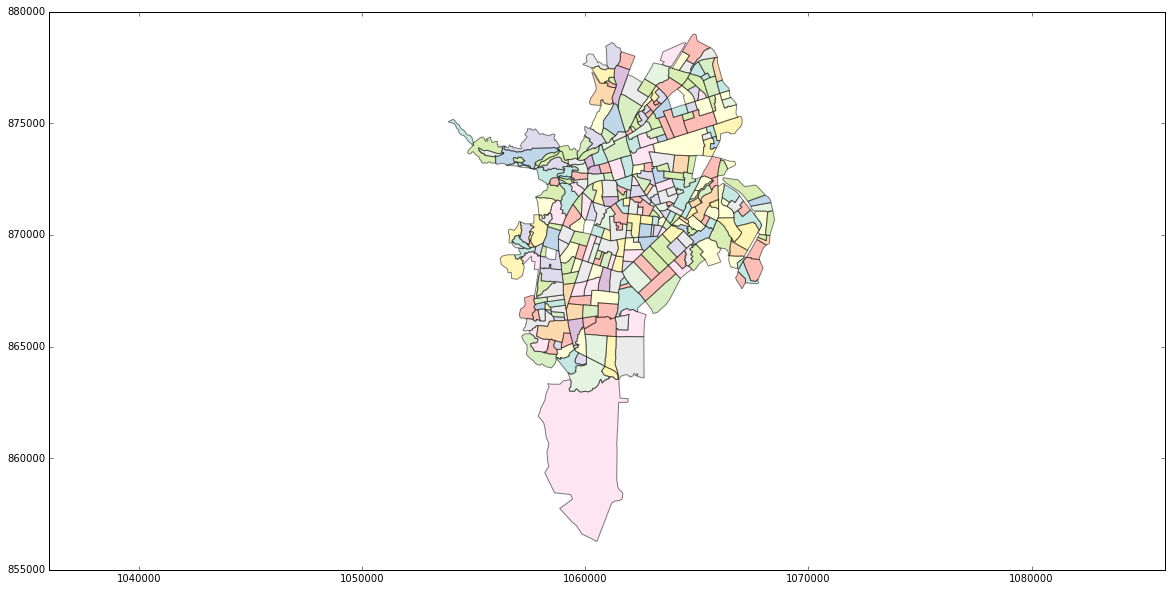

In [12]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

fig = plt.figure()
ax = fig.add_subplot(111)

clientes = dict(zip(lectura.GIS, lectura.Clientes))
dias = dict(zip(lectura.GIS, lectura.Dia))

for barrio, poly in zip(barrios, coordinates.values()):
    
    if barrio not in dias:
        print 'Problems with ' +barrio
        continue

    dia = dias[barrio]
    ax.add_patch(descartes.PolygonPatch(Polygon(poly), fc=color[dia], alpha=0.5))

ax.axis('equal')

plt.show()

# Chosen data structure: The Pandas DataFrame

In [13]:
d={'vecinos': pd.Series(vecinos),
   'poligono': pd.Series(coordinates),
   'clientes': pd.Series(dict(zip(lectura.GIS, lectura.Clientes))),
   'dia': pd.Series(dict(zip(lectura.GIS, lectura.Dia))),
   }

In [14]:
data = pd.DataFrame(d)

In [15]:
data.head()

,clientes,dia,poligono,vecinos
BARRIO 12 DE OCTUBRE,860.0,1.0,"[(1063826, 871089), (1063841, 871081), (106390...","[BARRIO EDUARDO SANTOS, BARRIO JULIO RINCON, B..."
BARRIO 20 DE JULIO,575.0,1.0,"[(1062733, 871782), (1062798, 871701), (106282...","[BARRIO ALFONSO BARBERENA, BARRIO EL PRADO, BA..."
BARRIO 3 DE JULIO,495.0,3.0,"[(1059828, 870878), (1059809, 870905), (105979...","[BARRIO ALAMEDA, BARRIO EL CEDRO, BARRIO EUCAR..."
BARRIO ACUEDUCTO SAN ANTONIO,3.0,2.0,"[(1059368, 873103), (1059379, 873036), (105938...","[BARRIO ARBOLEDA, BARRIO BELLAVISTA, BARRIO EL..."
BARRIO AGUABLANCA,1344.0,7.0,"[(1062280, 871491), (1062296, 871487), (106231...","[BARRIO EL JARDIN, BARRIO EL PRADO, BARRIO EL ..."


In [16]:
data;

In [17]:
len(data)

330

In [18]:
data.to_csv('data.csv')

# Coordinate parsing (GIS)

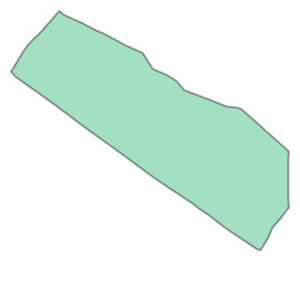

In [19]:
poligon

# Neighborghs check

### Example of creating a bigger geometry for checking intersection in neighborghs check

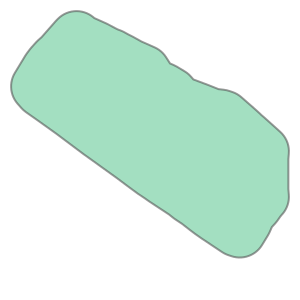

In [20]:
poligon.buffer(50)

BARRIO 12 DE OCTUBRE


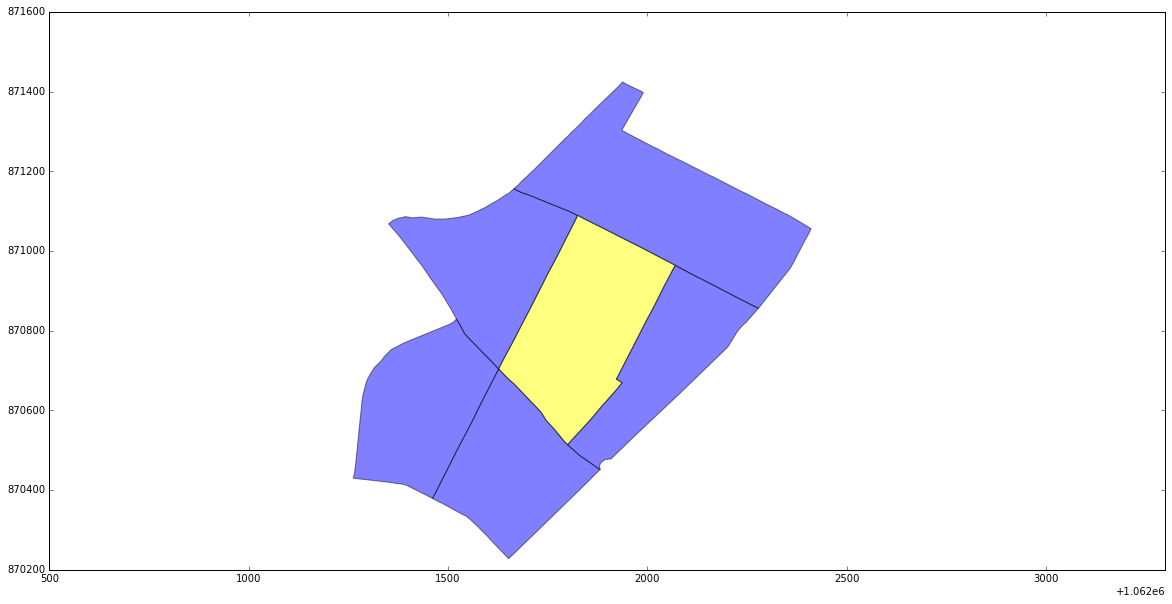

BARRIO 20 DE JULIO


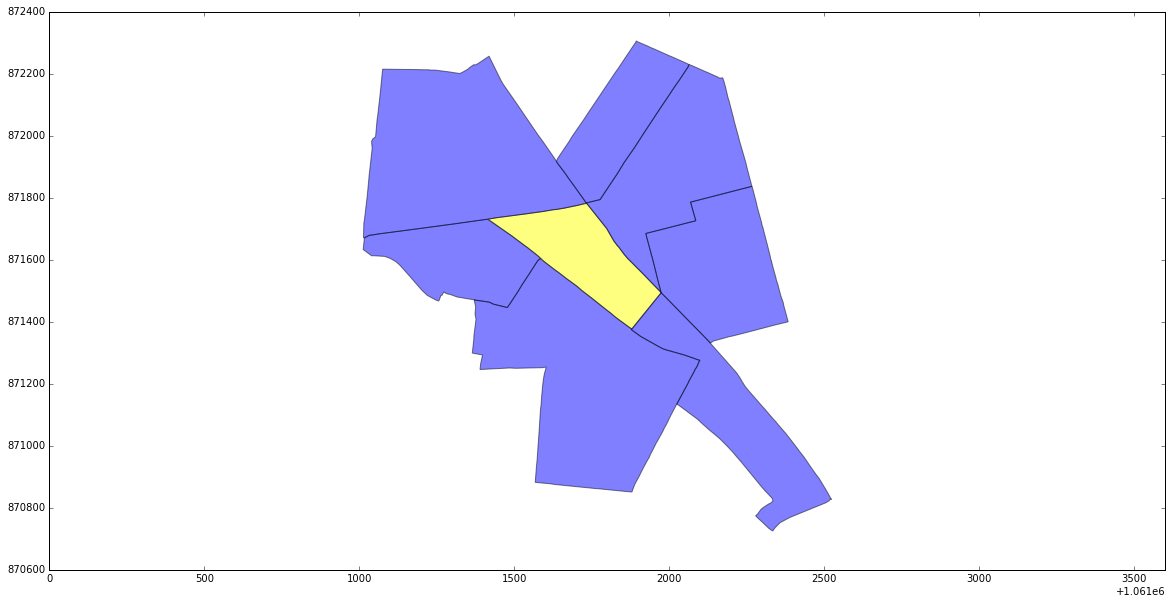

BARRIO 3 DE JULIO


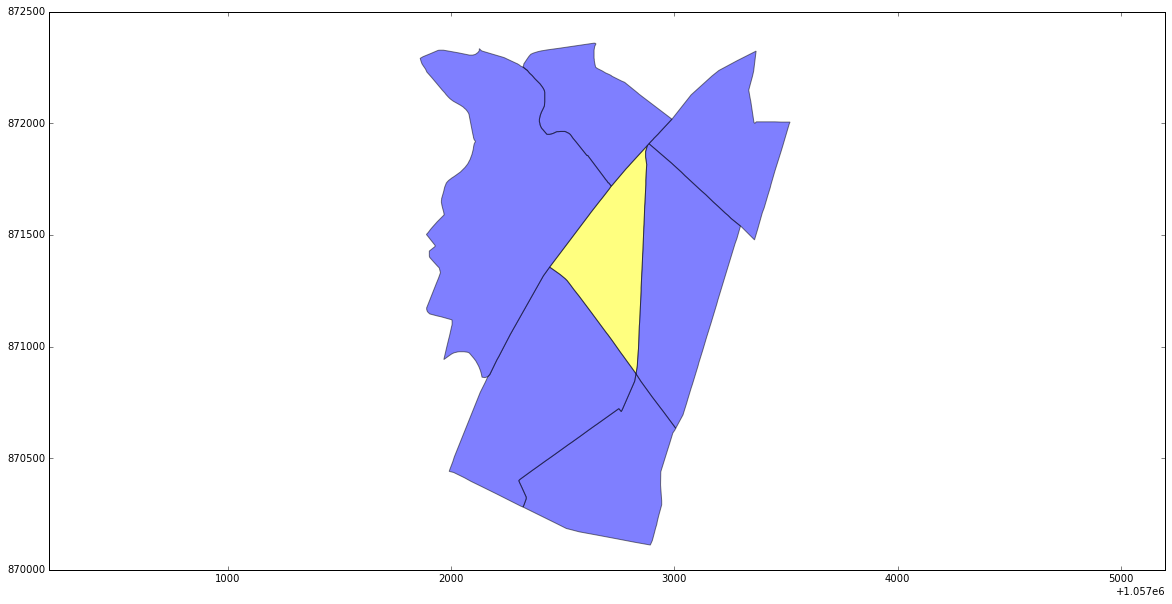

BARRIO ACUEDUCTO SAN ANTONIO


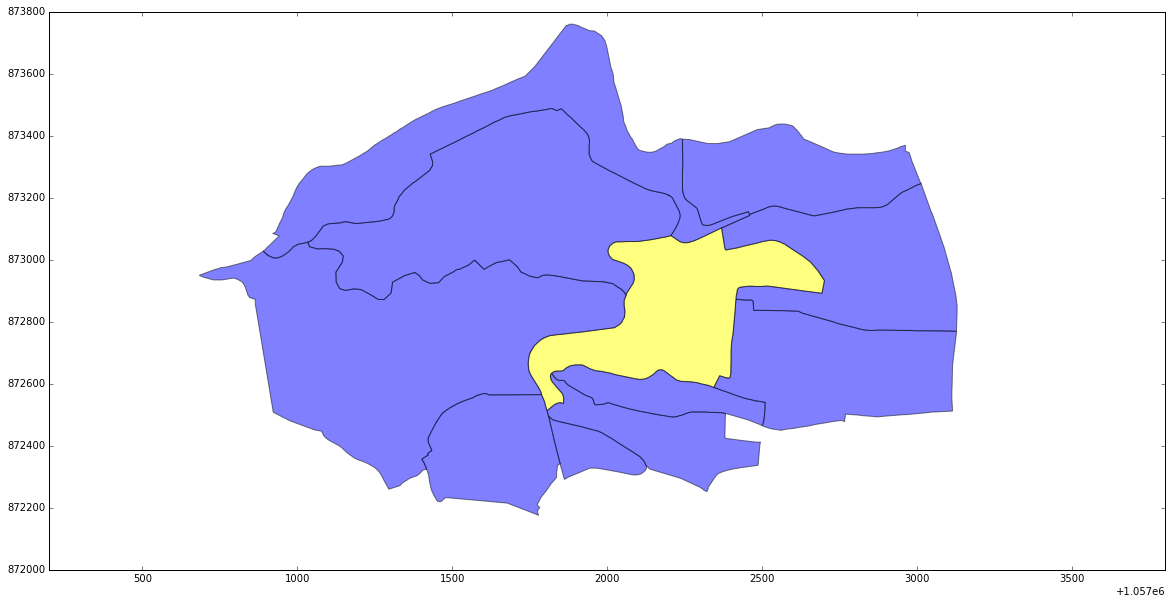

BARRIO AGUABLANCA


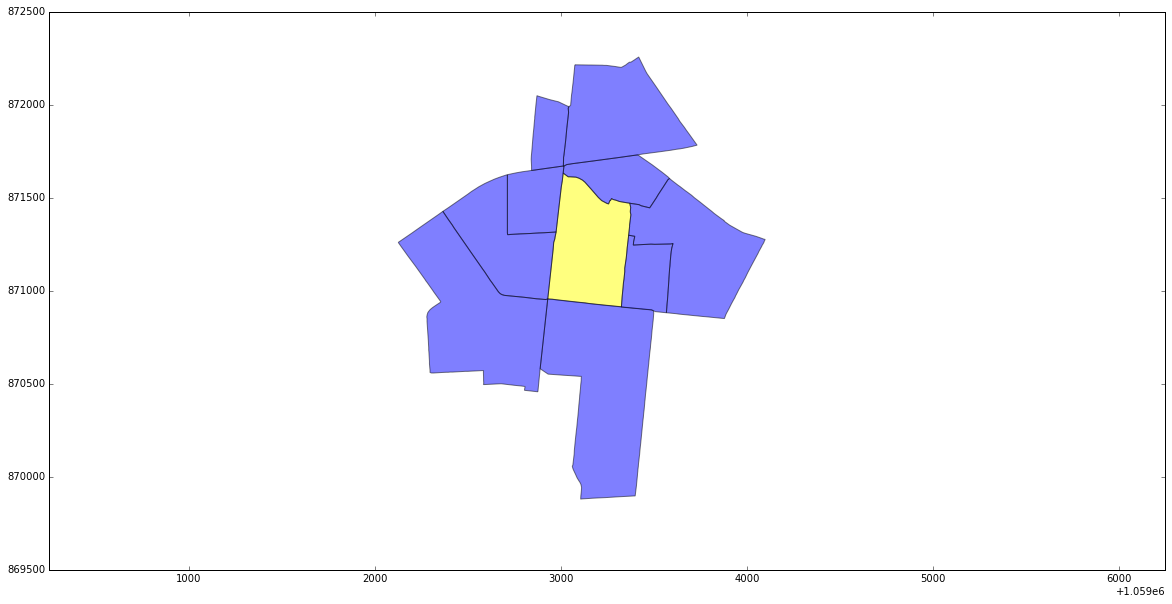

BARRIO AGUACATAL


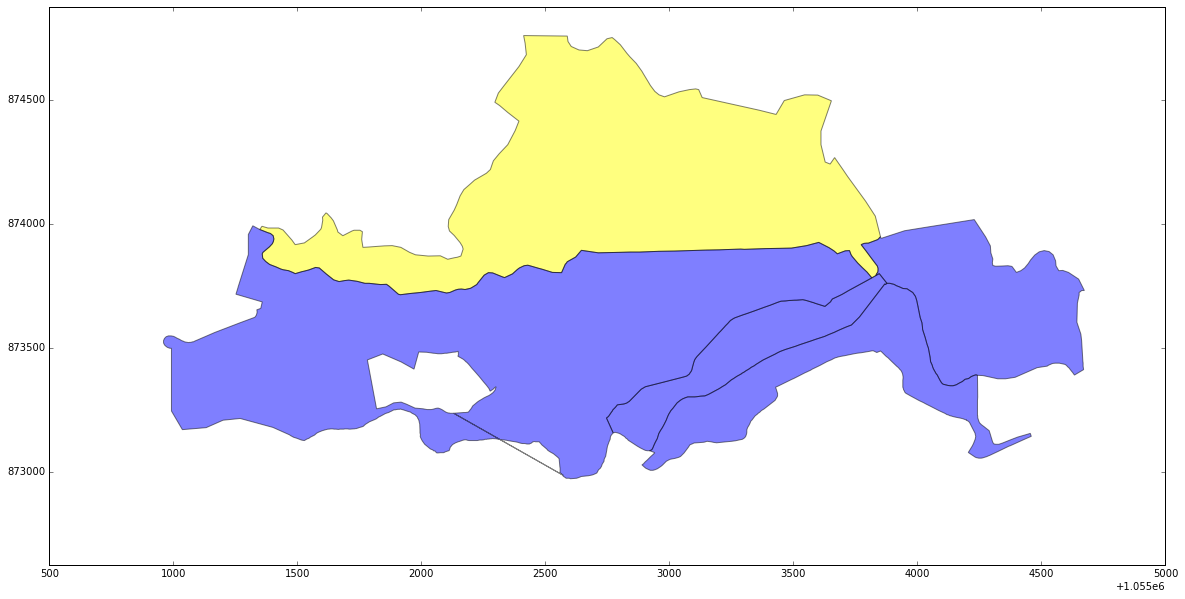

BARRIO ALAMEDA


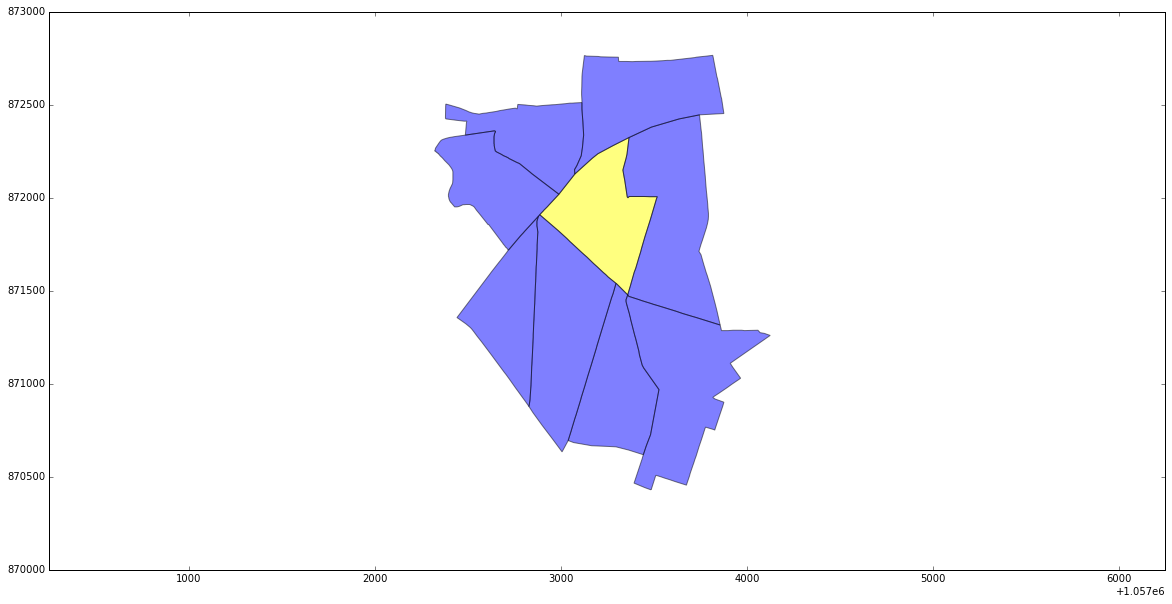

BARRIO ALCAZARES


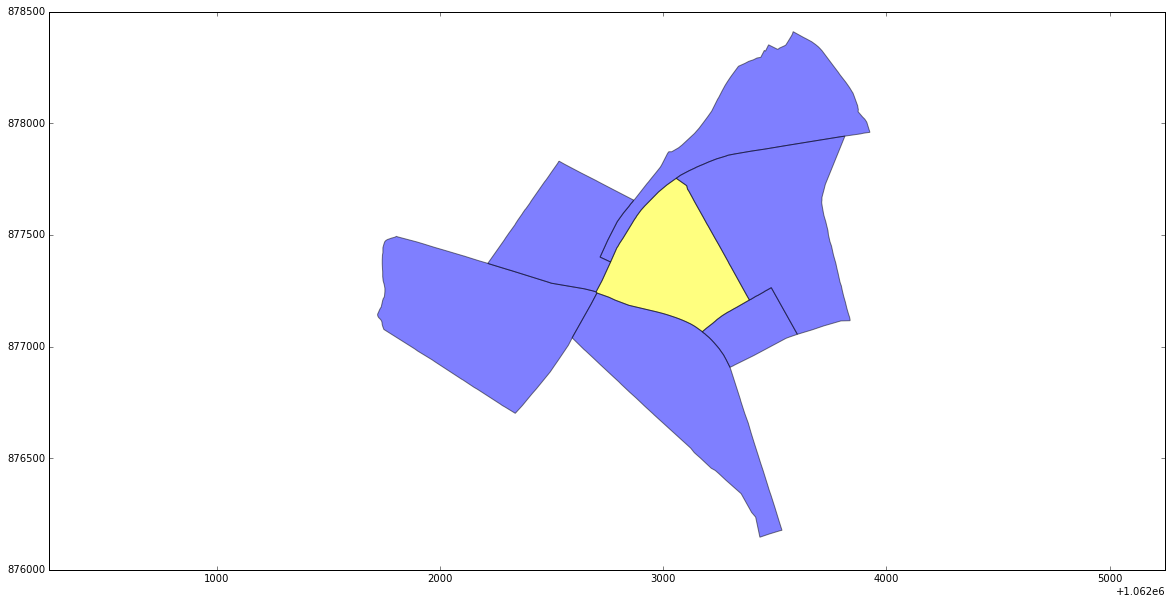

BARRIO ALFEREZ REAL CAMILO TORRES


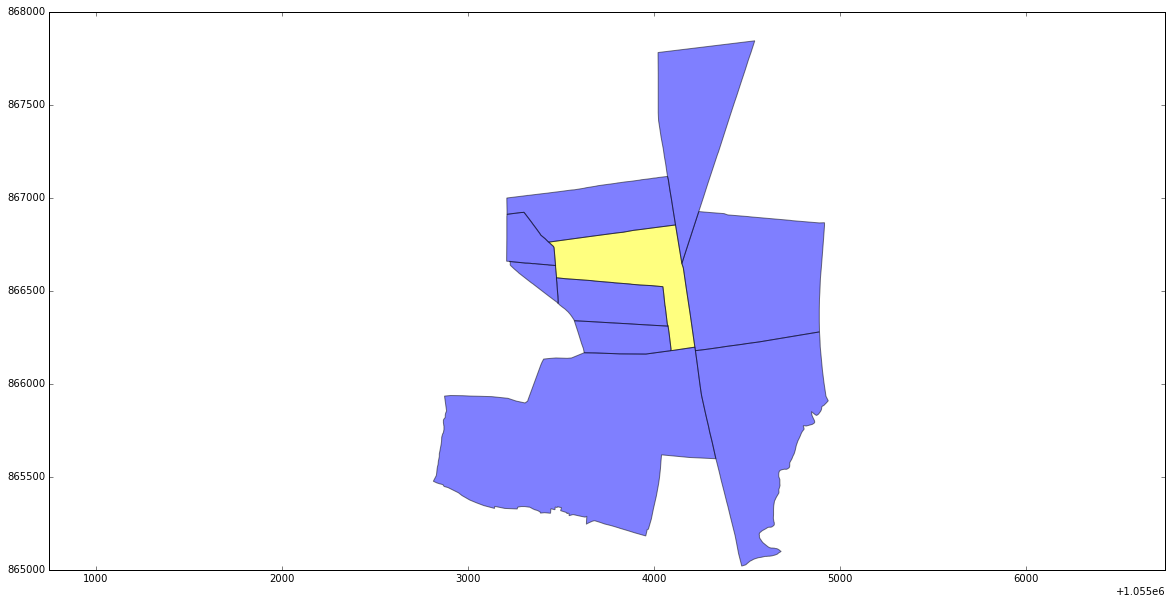

BARRIO ALFONSO BARBERENA


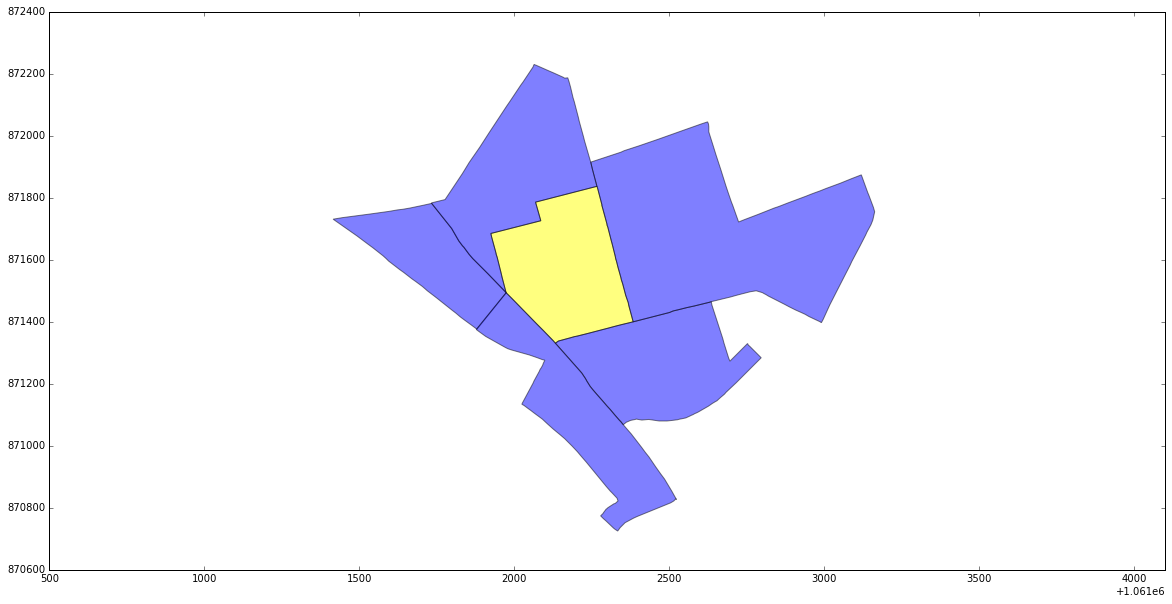

BARRIO ALFONSO BONILLA ARAGON


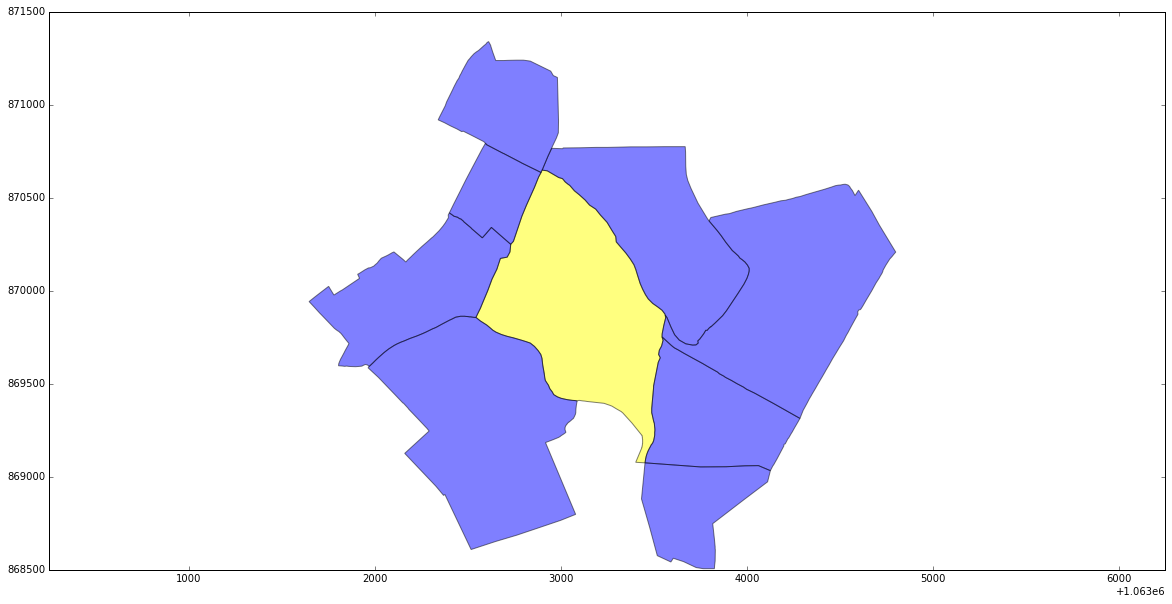

BARRIO ALFONSO LOPEZ ETAPA I


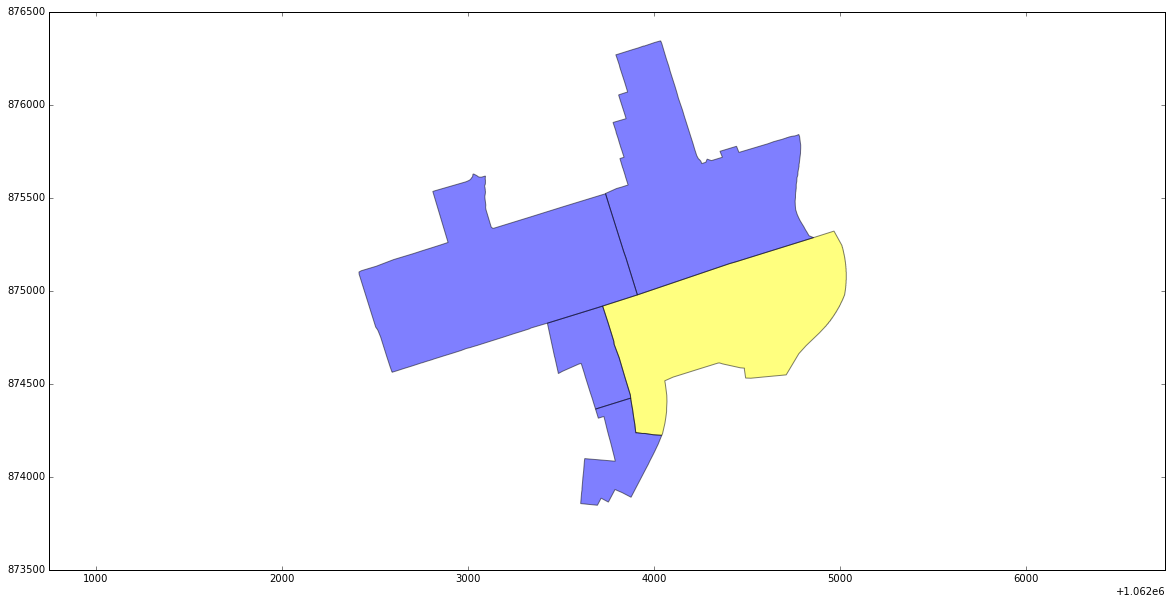

BARRIO ALIANZA


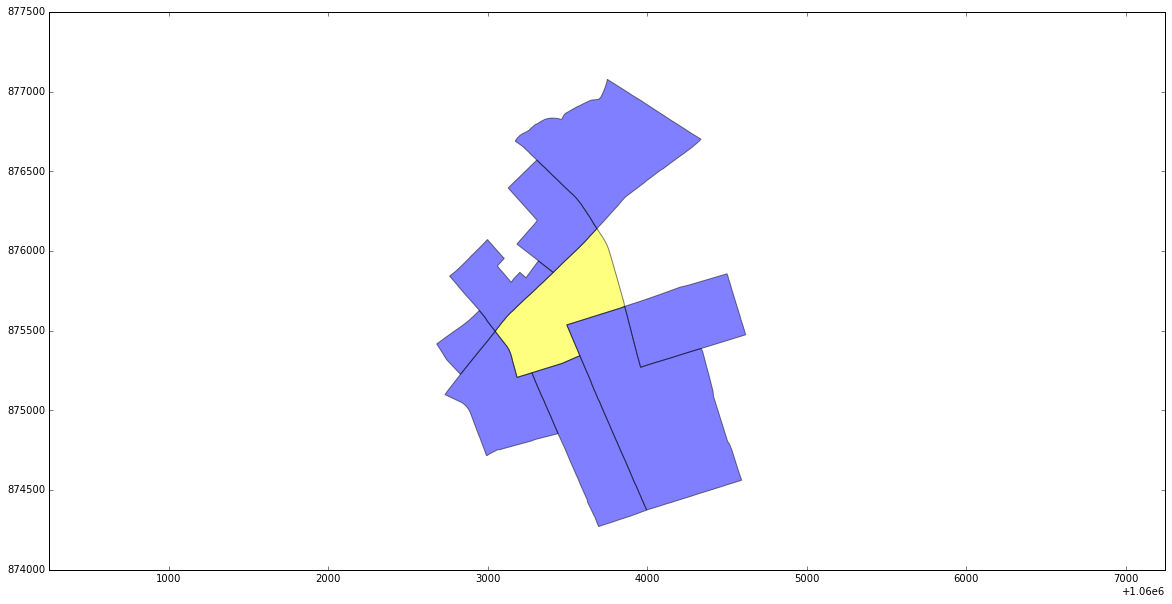

BARRIO ALIRIO MORA BELTRAN


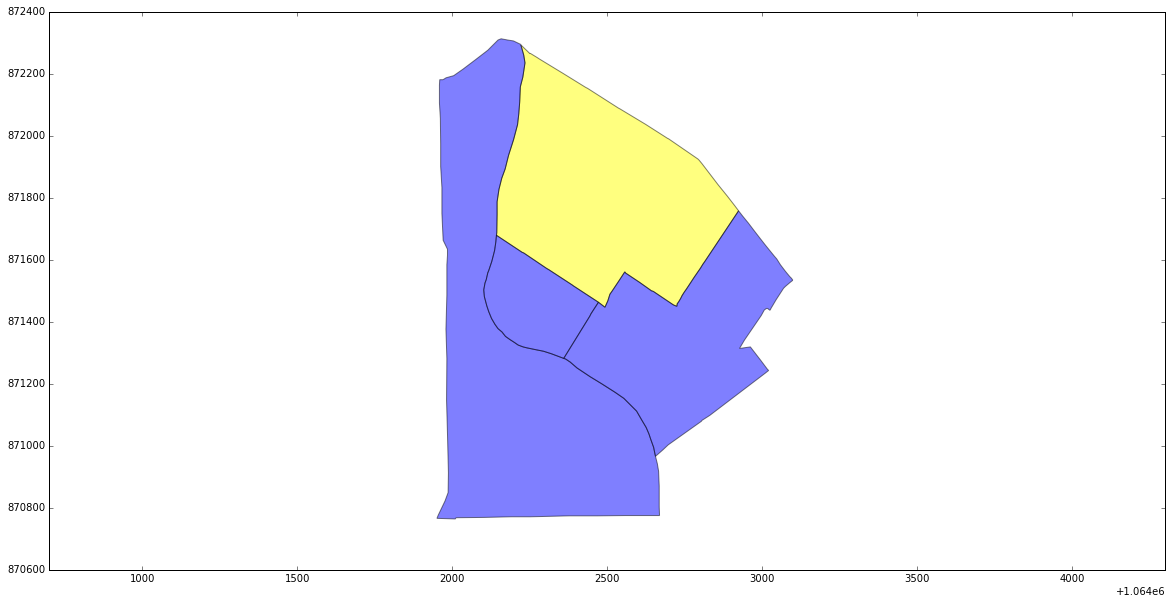

BARRIO ALTO JORDAN


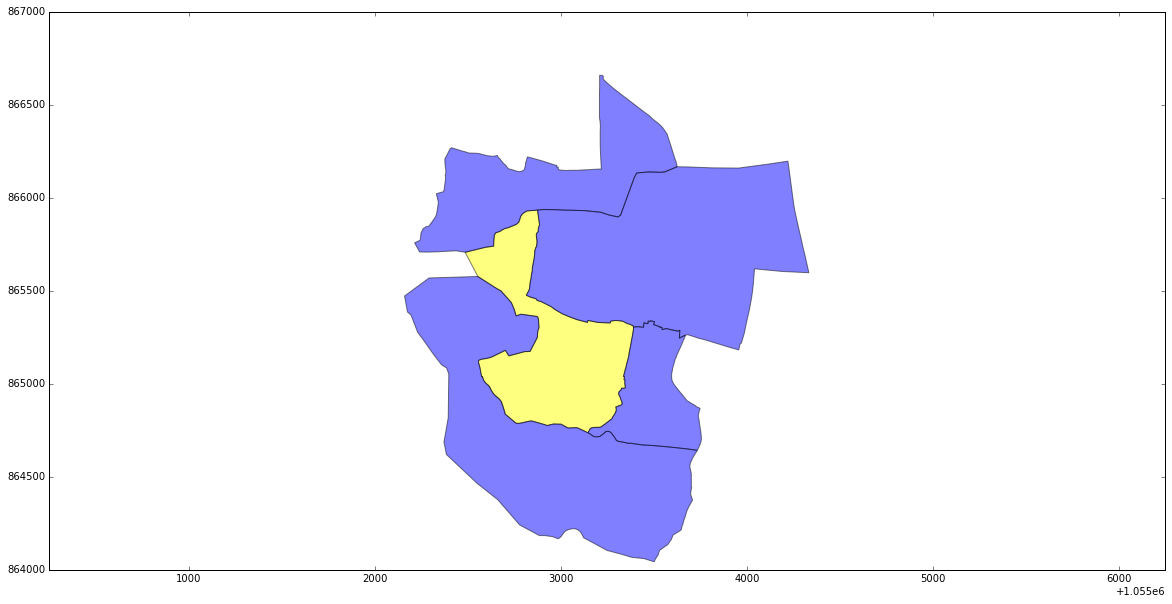

In [21]:
for barrio in barrios[:15]:
    print barrio
    fig = plt.figure()
    ax = fig.add_subplot(111)

    nodos_barrio = nodos[nodos.NOMBRE==barrio]
    coordinates_barrio = zip(nodos_barrio.X.values, nodos_barrio.Y.values)
    poligon = Polygon(coordinates_barrio)

    ax.add_patch(descartes.PolygonPatch(poligon, fc='yellow', alpha=0.5))


    for otro_barrio in barrios:
        nodos_barrio = nodos[nodos.NOMBRE==otro_barrio]
        otros_coordinates = zip(nodos_barrio.X.values, nodos_barrio.Y.values)

        barrio_poligono = Polygon(otros_coordinates)

        if poligon == barrio_poligono:
            continue

        # buffer is needed to be able to find neighborhs 
        if poligon.buffer(50).intersects(barrio_poligono):
            vecinos_del_barrio.append(otro_barrio)
            ax.add_patch(descartes.PolygonPatch(barrio_poligono, fc='blue', alpha=0.5))

    ax.axis('equal')

    plt.show()

# Mean Absolute Deviation by day

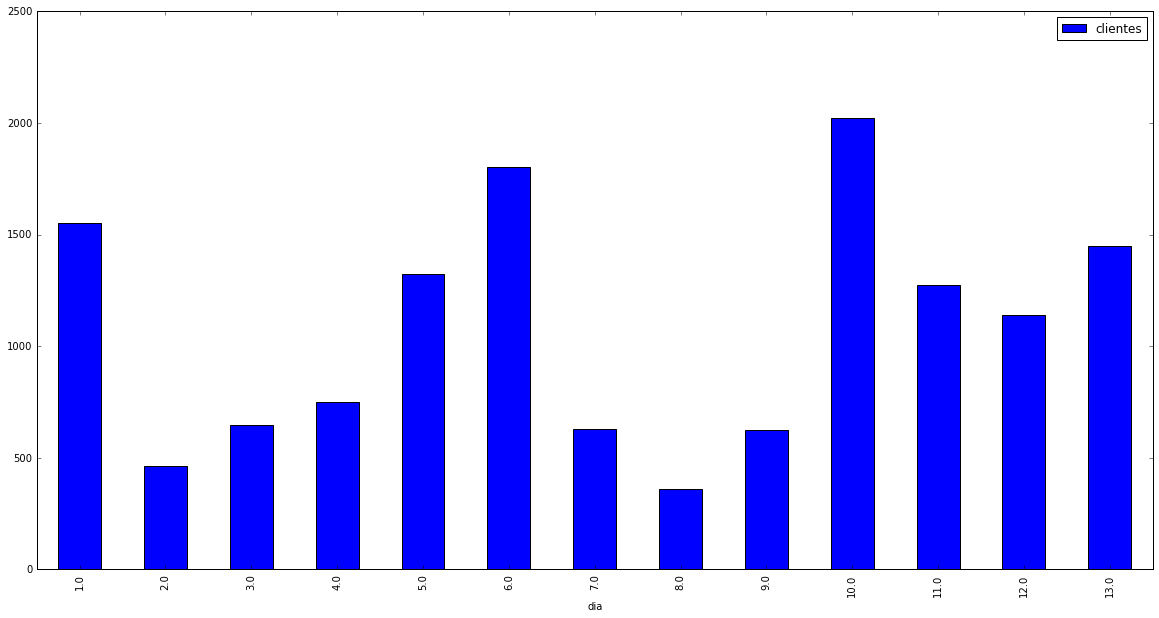

In [22]:
data.groupby('dia').mad().plot.bar()

# Calculating the distance between barrios using a graph

In [23]:
number_index = range(1, len(barrios))

In [24]:
barrio_id = dict(zip(number_index, data.index.values));

In [25]:
len(data)

330

In [26]:
barrios = 329
b = range(329)

In [27]:
dias = 13
d = range(dias)

In [28]:
S = dok_matrix((dias, barrios), dtype=np.int16)

NameError: name 'dok_matrix' is not defined

In [ ]:
S

In [29]:
vecinos


{'BARRIO 12 DE OCTUBRE': ['BARRIO EDUARDO SANTOS',
  'BARRIO JULIO RINCON',
  'BARRIO LOS CONQUISTADORES',
  'BARRIO SAN PEDRO CLAVER',
  'BARRIO SINDICAL'],
 'BARRIO 20 DE JULIO': ['BARRIO ALFONSO BARBERENA',
  'BARRIO EL PRADO',
  'BARRIO PRADOS DE ORIENTE',
  'BARRIO PRIMITIVO CRESPO',
  'BARRIO SANTA MONICA POPULAR',
  'BARRIO URIBE URIBE',
  'BARRIO VILLANUEVA'],
 'BARRIO 3 DE JULIO': ['BARRIO ALAMEDA',
  'BARRIO EL CEDRO',
  'BARRIO EUCARISTICO',
  'BARRIO MIRAFLORES',
  'BARRIO NUEVO SAN FERNANDO',
  'BARRIO SAN FERNANDO VIEJO'],
 'BARRIO ACUEDUCTO SAN ANTONIO': ['BARRIO ARBOLEDA',
  'BARRIO BELLAVISTA',
  'BARRIO EL MORTINAL',
  'BARRIO EL NACIONAL',
  'BARRIO EL PE_ON',
  'BARRIO NAVARRO- LA CHANCA',
  'BARRIO SAN ANTONIO',
  'BARRIO SAN CAYETANO',
  'BARRIO SANTA BARBARA',
  'BARRIO SANTA TERESITA'],
 'BARRIO AGUABLANCA': ['BARRIO EL JARDIN',
  'BARRIO EL PRADO',
  'BARRIO EL RECUERDO',
  'BARRIO LAS ACACIAS',
  'BARRIO PRADOS DE ORIENTE',
  'BARRIO PRIMITIVO CRESPO',
  'BARR

In [ ]:
for i in b:
    for j in d:
        S[j,i] = i + j

In [43]:
machete = dict(zip(sorted(vecinos.keys()), range(len(vecinos.keys()))))
machete_inverso = dict(zip(range(len(vecinos.keys())), sorted(vecinos.keys())))

In [37]:
machete['BARRIO EL JORDAN']

96

In [45]:
machete_inverso[96]

'BARRIO EL JORDAN'

In [55]:
num_barrios = len(vecinos.keys())
matriz_vecinos = np.zeros((num_barrios, num_barrios), dtype=np.uint8)

for i in range(num_barrios):
    nombre_barrio = machete_inverso[i]
    lista_vecinos = vecinos[nombre_barrio]
    for v in lista_vecinos:
        j = machete[v]
        matriz_vecinos[i, j] = 1

In [56]:
veci = pd.DataFrame(matriz_vecinos)

In [57]:
veci

,0,1,2,3,4,5,6,7,8,9,...,319,320,321,322,323,324,325,326,327,328
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
veci.to_csv('adyacencia.csv', sep=';')